# SIS 2 (6 points)

Deadline for submission : **Monday 24th March : 23h50**

- The defense for this SIS will take place next week on **February 27 and March 1**.  
- During the defense, I will ask you to explain your solutions, and you may also receive additional questions.  
- If you are working in a group of two and are not from the same practical class, please contact me in advance to schedule your defense during office hours.  
- Unjustified absences will result in a zero for the assignment, even if you have completed and submitted your work.  


**THE CODE SHOULD BE RUN AND RESULTS NOT CLEARED**

---

## Exercise 1 : Gauss-Markov Assumptions

- **This exercise should be solved on PAPER (and photo or scan should be send).**

- Proofs should be DETAILED (otherwise they aren't proofs...). 





Consider the multi-linear model:

$
y_i = X \beta + \epsilon_i
$

where:
- $y_i$ is an $(n \times 1)$ vector of observations,
- $X$ is an $(n \times k)$ matrix of independent variables,
- $\beta$ is a $(k \times 1)$ vector of parameters,
- $\epsilon_i$ is an $(n \times 1)$ vector of error terms.

And the OLS estimator $\hat{\beta} = (X'X)^{-1} X'y$


---
#### 1. What does the Gauss-Markov theorem states ?

---
#### 2. Which assumptions do you need in order to show that $\hat{\beta}$ is identified? Show identification.

---
#### 3. Show that $\hat{\beta}$ is unbiased, 

i.e., $\mathbb{E}[\hat{\beta}] = \beta$.

---
#### 4. Prove that $\operatorname{Var}(\hat{\beta}) = \sigma^2 (X'X)^{-1}$.

---
#### 5. Efficiency of $\hat{\beta}$ and the Gauss-Markov Theorem  

Let $\tilde{\beta}$ be another **linear and unbiased** estimator of $\beta$. That is,  


$\tilde{\beta} = Ay$


for some matrix $A$ such that $\mathbb{E}[\tilde{\beta}] = \beta$.  

Using **Cochran’s theorem**, show that the variance of any other linear unbiased estimator $\tilde{\beta}$ is always at least as large as the variance of $\hat{\beta}$, the OLS estimator.  

Conclude that $\hat{\beta}$ is the **Best Linear Unbiased Estimator (BLUE)** according to the **Gauss-Markov theorem**.  

---
#### 6. Consistency of $\hat{\beta}$  

A sequence of estimators $\hat{\beta}_n$ is said to be **consistent** for $\beta$ if:  

$\hat{\beta}_n \xrightarrow{p} \beta \quad \text{(convergence in probability)}.$

This means that as the sample size increases, $\hat{\beta}_n$ gets arbitrarily close to $\beta$ with high probability.  

Using the **Law of Large Numbers (LLN)**, prove that the OLS estimator $\hat{\beta}$ is consistent under standard assumptions.  


---

## Exercise 2 : Linear Dependence and Rank of a Matrix

**Understanding Linear Dependence in Matrices**

In the context of a matrix, **linear dependence** refers to a situation where one or more columns (or rows) can be written as a linear combination of other columns (or rows). If all columns (or rows) are linearly independent, no such relationship exists.

A set of column vectors $ \mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_n $ in $ \mathbb{R}^m $ is **linearly dependent** if there exist scalars $ c_1, c_2, \dots, c_n $, **not all zero**, such that:

$$
c_1 \mathbf{v}_1 + c_2 \mathbf{v}_2 + \dots + c_n \mathbf{v}_n = \mathbf{0}
$$

Equivalently, a matrix $ A $ with columns $ \mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_n $ is **linearly dependent** if there is a nontrivial solution to:

$$
A \mathbf{c} = \mathbf{0}
$$

where $ A = [\mathbf{v}_1 \, \mathbf{v}_2 \, \dots \, \mathbf{v}_n] $ and $ \mathbf{c} \neq \mathbf{0} $.

One way to determine if a set of vectors (columns or rows) is linearly dependent is by checking the **rank** of the matrix.

- The **rank** of a matrix $ A $ is the number of **linearly independent** columns (or rows).
- If $ \text{rank}(A) = n $ (the number of columns), the columns are **linearly independent**.
- If $ \text{rank}(A) < n $, then at least one column can be written as a linear combination of the others, meaning the columns are **linearly dependent**.

To compute the rank of a matrix, we can transform it into **Row Echelon Form (REF)** using **Gaussian Elimination**. The number of nonzero rows in REF corresponds to the rank:

$$
\text{rank}(A) = \text{number of nonzero rows in REF}
$$

If $ \text{rank}(A) < n $, the matrix has **linearly dependent columns**.

---

#### **Task: Implement Rank Calculation Using Gaussian Elimination**
Your goal is to implement a function that determines the rank of a matrix using Gaussian Elimination, without relying on external libraries (like NumPy or SciPy). 
Then, using your function, determine whether the given matrices are linearly independent.

### **Instructions**
1. Implement the function `rank_of_matrix(matrix: list[list[float]]) -> int` that:
   - Takes a matrix as a list of lists.
   - Performs Gaussian elimination to convert it into row echelon form.
   - Returns the rank (i.e., the number of nonzero rows in the echelon form).

2. Use your function to determine if the following matrices have **linearly independent columns**.

### **Example Matrices**
```python
matrix1 = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

matrix2 = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]

matrix3 = [
    [1, 2, 3, 4],
    [4, 5, 6, 7],
    [7, 8, 9, 10],
    [1, 1, 1, 1]
]

In [1]:
def rank_matrix(matrix):
    """Returns the rank of a matrix using Gaussian elimination."""
    rows = len(matrix)
    cols = len(matrix[0])
    rank = 0
    
    for col in range(cols):
        pivot_row = rank
        while pivot_row < rows and matrix[pivot_row][col] == 0:
            pivot_row += 1
        
        if pivot_row == rows:
            continue
        
        matrix[pivot_row], matrix[rank] = matrix[rank], matrix[pivot_row]
        pivot = matrix[rank][col]
        
        for j in range(col, cols):
            matrix[rank][j] /= pivot
        
        for i in range(rows):
            if i != rank and matrix[i][col] != 0:
                factor = matrix[i][col]
                for j in range(col, cols):
                    matrix[i][j] -= factor * matrix[rank][j]
        
        rank += 1
    
    return rank

matrix1 = [[1, 2, 3], 
           [4, 5, 6], 
           [7, 8, 10]]
print("Rank of matrix1:", rank_matrix(matrix1))

matrix2 = [[1, 2, 3], 
           [2, 4, 6], 
           [3, 6, 9]]
print("Rank of matrix2:", rank_matrix(matrix2))

matrix3 = [
    [1, 2, 3, 4],
    [4, 5, 6, 7],
    [7, 8, 9, 10],
    [1, 1, 1, 1]
]
print("Rank of matrix3:", rank_matrix(matrix3))

# Checking for linear independence
def is_linearly_independent(matrix):
    rows, cols = len(matrix), len(matrix[0])
    return rank_matrix(matrix) == min(rows, cols)

print("Matrix1 is linearly independent:", is_linearly_independent(matrix1))
print("Matrix2 is linearly independent:", is_linearly_independent(matrix2))
print("Matrix3 is linearly independent:", is_linearly_independent(matrix3))


Rank of matrix1: 3
Rank of matrix2: 1
Rank of matrix3: 2
Matrix1 is linearly independent: True
Matrix2 is linearly independent: False
Matrix3 is linearly independent: False


## Exercise 3 : Coding tasks

Consider the following dataset

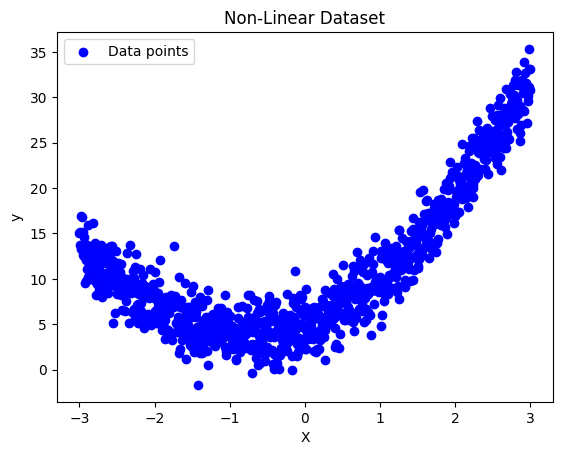

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.linspace(-3, 3, 1_000).reshape(-1, 1)
y = 2 * X**2 + 3 * X + 5 + np.random.normal(0, 2, X.shape)

plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-Linear Dataset')
plt.legend()
plt.show()


### **Step 1**

You should implement a custom regression class using the template below that does the following:
- Parameters: Accepts a flag to include a constant (intercept) or not.
- Fit: Estimate the OLS parameters using the formulas
$$\widehat a = \frac{\sum\limits_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum\limits_{i=1}^n (x_i - \bar{x})^2}, \quad 
    \widehat b = \bar{y} - \widehat a \bar{x}.$$
- Predict: Compute predictions using the estimated parameters.
- Residuals: Return the residuals, defined as:
$$ residuals = y − \widehat y $$

In [22]:
class CustomLinearRegression:
    def __init__(self, use_intercept=True):
        self.use_intercept = use_intercept
        self.coef_ = None
        self.intercept_ = 0
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        x_mean = np.mean(X)
        y_mean = np.mean(y)
        
        numerator = np.sum((X - x_mean) * (y - y_mean))
        denominator = np.sum((X - x_mean) ** 2)
        
        self.coef_ = numerator / denominator
        self.intercept_ = y_mean - self.coef_ * x_mean
    
    def predict(self, X):
        X = np.array(X)
        return self.intercept_ + self.coef_ * X 
    
    def residuals(self, y_predict, y):
        y = np.array(y)
        return y - y_predict


### Step 2
- Split the dataset into training and testing sets
- Use your custom linear regression class to fit the model

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.25, shuffle=True)

In [24]:
model = CustomLinearRegression(use_intercept=True)
model.fit(X_train, y_train)

### Step 3
- Compute predictions for the test data.

In [25]:
y_predict = model.predict(X_test)

### Step 4

- Plot the actual data points and overlay the regression line from your custom model.

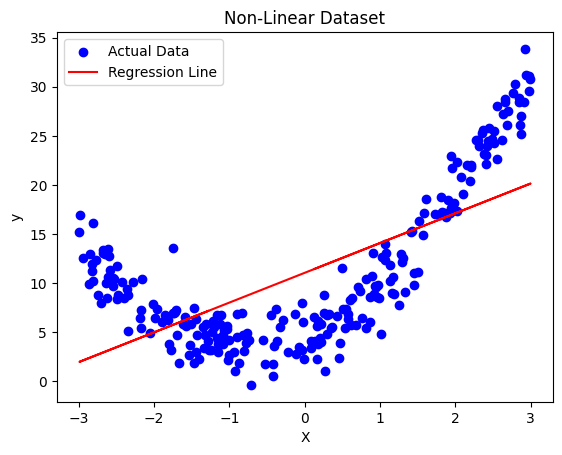

In [26]:

plt.scatter(X_test, y_test, color='blue', label='Actual Data')

plt.plot(X_test, y_predict, color='red', label='Regression Line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-Linear Dataset')
plt.legend()
plt.show()

### Step 5
- Create a plot of residuals 
- Are the residuals randomly dispersed around zero?
- What does the pattern (or lack thereof) tell you about the appropriateness of a linear model for this dataset?

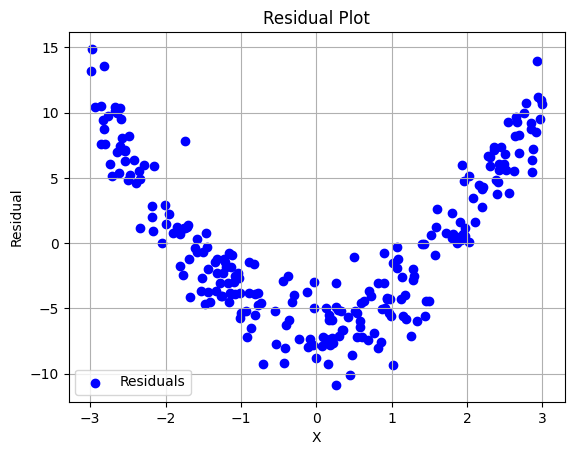

In [27]:
residuals = model.residuals(y_predict, y_test)

plt.scatter(X_test, residuals, color='blue', label='Residuals')
plt.xlabel('X')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()


Residuals are not normally distributed. Linear model is not appropriate for this dataset.

### Step 6

- Use sklearn to implement Polynomial Regression and fit it on the same dataset.
- Compare the results.

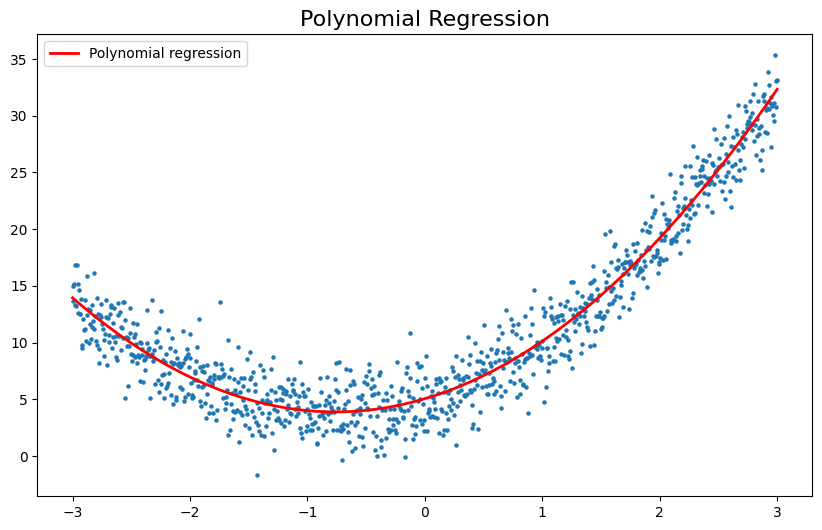

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42, test_size=0.25, shuffle=True)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


y_predict = linear_model.predict(X_poly)   # to ensure the polynomial fit will not be discontinuous we cover the entire input



sorted_indices = np.argsort(X.flatten())   # train_test_split() shuffles the data, so we need to sort it back 
X_sorted = X.flatten()[sorted_indices]   
y_predict_sorted = y_predict[sorted_indices]  


plt.figure(figsize=(10, 6))
plt.title("Polynomial Regression", size=16)
plt.scatter(X, y, s=5)  
plt.plot(X_sorted, y_predict_sorted, c="red", linewidth=2, label="Polynomial regression")  
plt.legend()
plt.show()

### Final Discussion

- Discuss how the linear model may underfit the data because it cannot capture the inherent non-linear relationships
- Explain how introducing polynomial terms leads to a better fit

Linear model is too simple to capture the pattern, while the dataset is not linear. 

We transformed the input features to include 2nd degree terms. 

Its coefficients can now capture non-linear relationship and fit the curve.